# Experiments - Mean Time Taken per Polycube

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:
# load data
time_taken_3x3x3 = pd.read_csv('3x3x3-time_taken.csv', index_col='seed')
time_taken_5x3x3 = pd.read_csv('5x3x3-time_taken.csv', index_col='seed')
time_taken_4x4x4 = pd.read_csv('4x4x4-time_taken.csv', index_col='seed')
time_taken_6x4x4 = pd.read_csv('6x4x4-time_taken.csv', index_col='seed')

# remove outliers
time_taken_3x3x3 = time_taken_3x3x3[(np.abs(zscore(time_taken_3x3x3)) < 3).all(axis=1)]
time_taken_5x3x3 = time_taken_5x3x3[(np.abs(zscore(time_taken_5x3x3)) < 3).all(axis=1)]
time_taken_4x4x4 = time_taken_4x4x4[(np.abs(zscore(time_taken_4x4x4)) < 3).all(axis=1)]
time_taken_6x4x4 = time_taken_6x4x4[(np.abs(zscore(time_taken_6x4x4)) < 3).all(axis=1)]

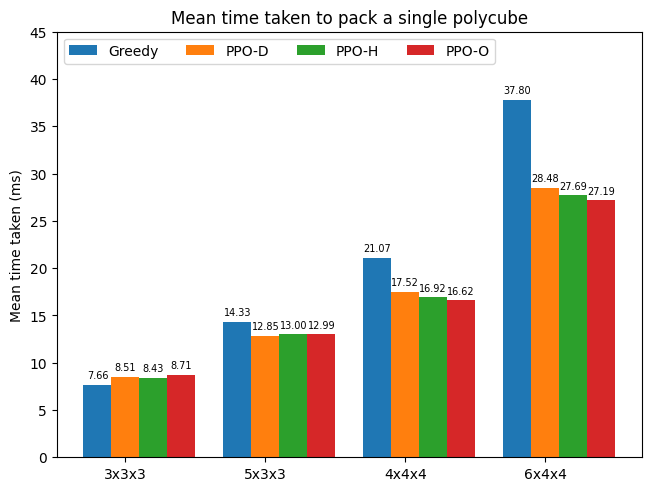

In [8]:
# source: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

sizes = ("3x3x3", "5x3x3", "4x4x4", "6x4x4")
time_taken_means = {
    'Greedy': (time_taken_3x3x3['greedy'].mean(), time_taken_5x3x3['greedy'].mean(), time_taken_4x4x4['greedy'].mean(), time_taken_6x4x4['greedy'].mean()),
    'PPO-D': (time_taken_3x3x3['ppo-d'].mean(), time_taken_5x3x3['ppo-d'].mean(), time_taken_4x4x4['ppo-d'].mean(), time_taken_6x4x4['ppo-d'].mean()),
    'PPO-H': (time_taken_3x3x3['ppo-h'].mean(), time_taken_5x3x3['ppo-h'].mean(), time_taken_4x4x4['ppo-h'].mean(), time_taken_6x4x4['ppo-h'].mean()),
    'PPO-O': (time_taken_3x3x3['ppo-o'].mean(), time_taken_5x3x3['ppo-o'].mean(), time_taken_4x4x4['ppo-o'].mean(), time_taken_6x4x4['ppo-o'].mean())
}

x = np.arange(len(sizes))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in time_taken_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, fmt='{:.2f}', padding=3, fontsize=7)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean time taken (ms)')
ax.set_title('Mean time taken to pack a single polycube')
ax.set_xticks(x + width, sizes)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 45)

plt.show()